        Date  Temperature (°C)  Precipitation (mm)  Month  Day
0 2025-01-01              26.0                 0.6      1    1
1 2025-01-02              25.0                 1.2      1    2
2 2025-01-03              26.8                 3.4      1    3
3 2025-01-04              28.8                 1.3      1    4
4 2025-01-05              25.6                 4.1      1    5


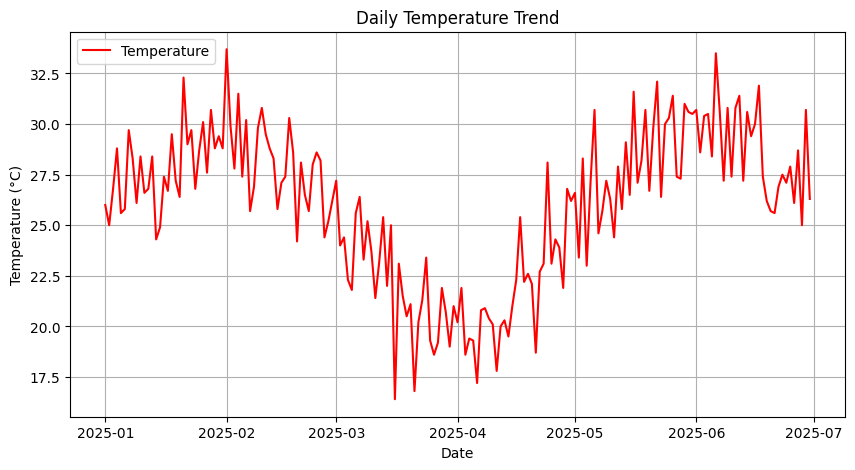

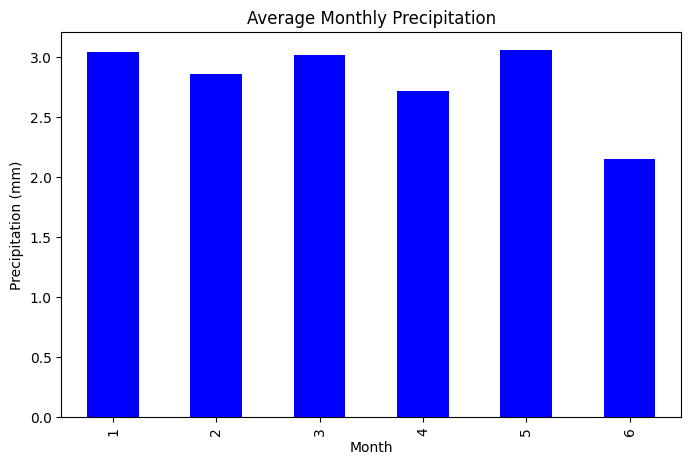

/tmp/ipython-input-731967203.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Temperature (°C)', data=df, palette="Set2")


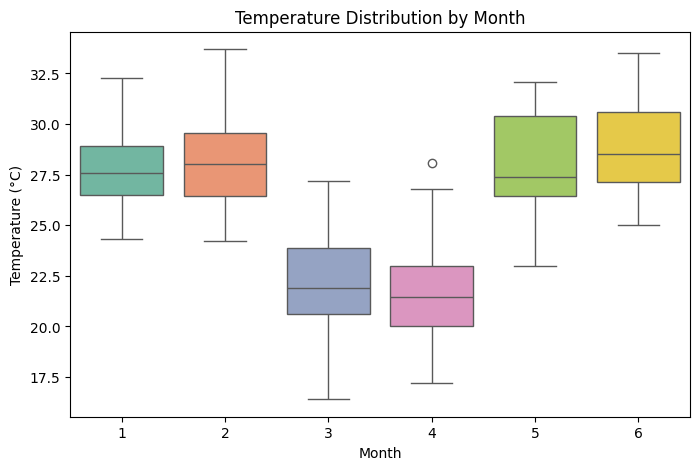

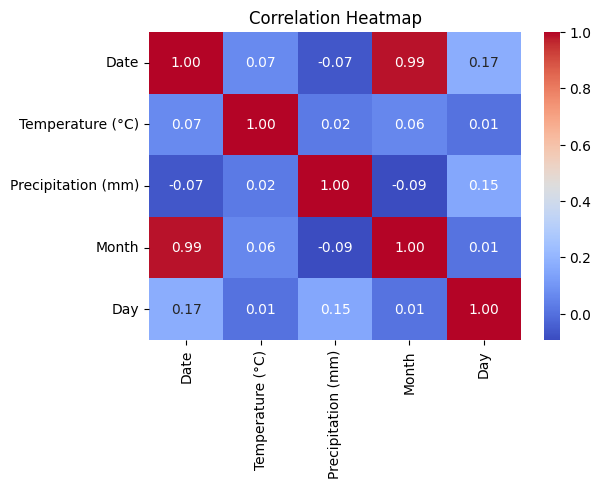

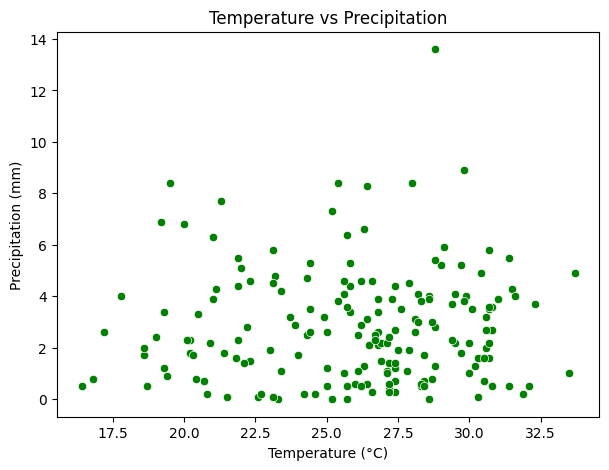

Model Evaluation:
MAE: 2.97
RMSE: 3.43
R²: -0.10


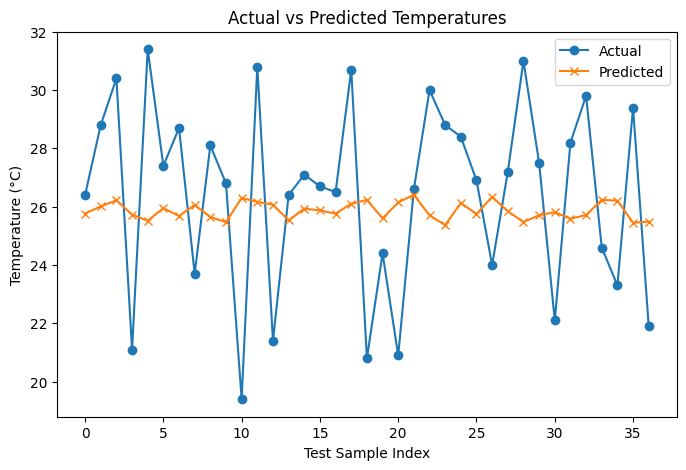

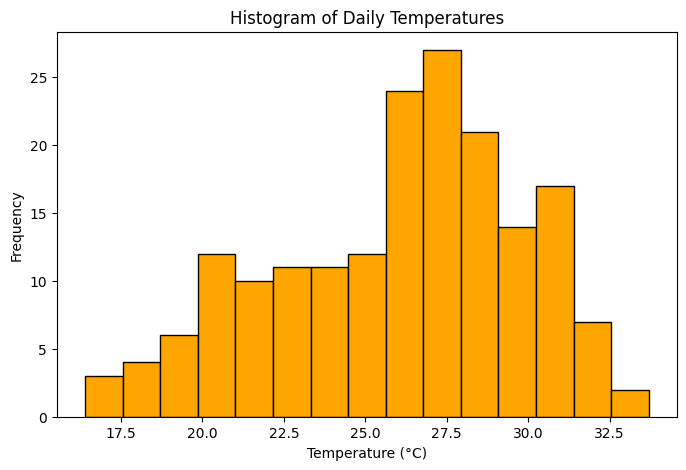

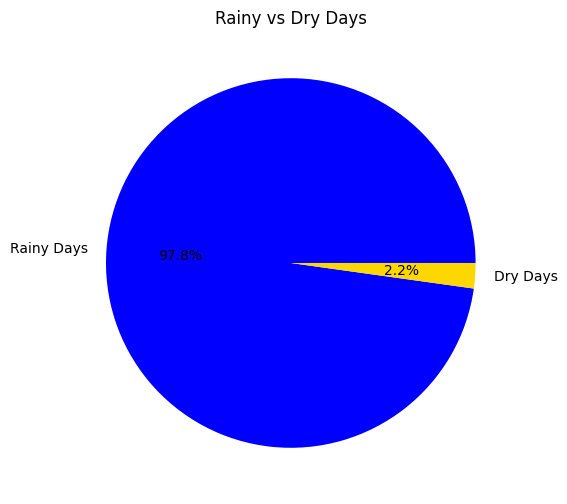

/tmp/ipython-input-731967203.py:111: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Month', y='Precipitation (mm)', data=df, palette="coolwarm")


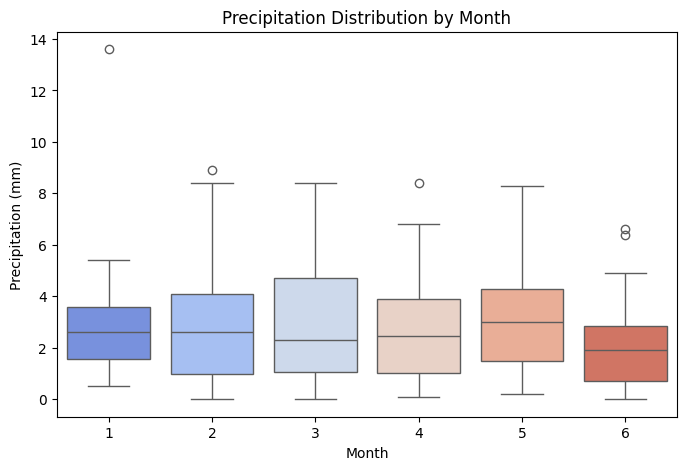

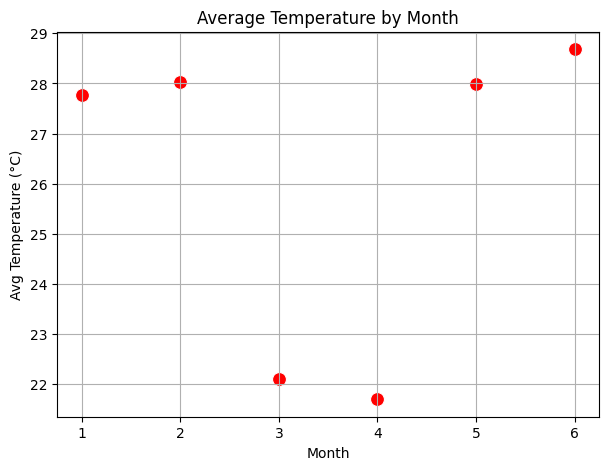

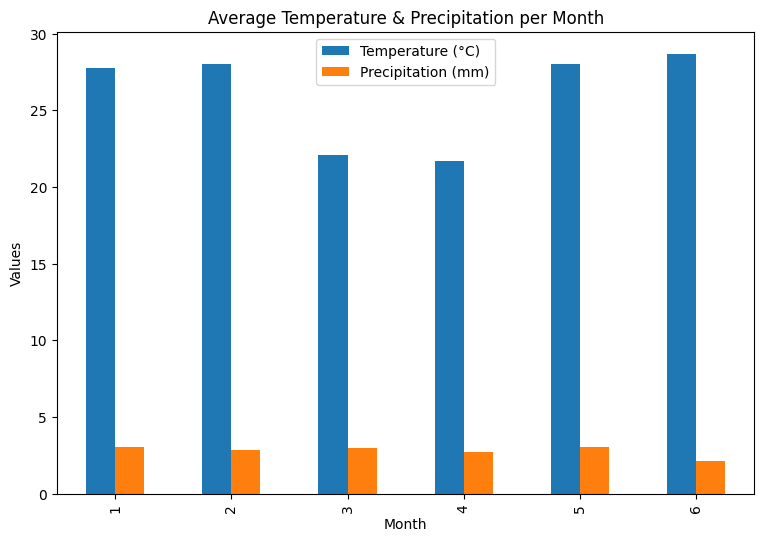

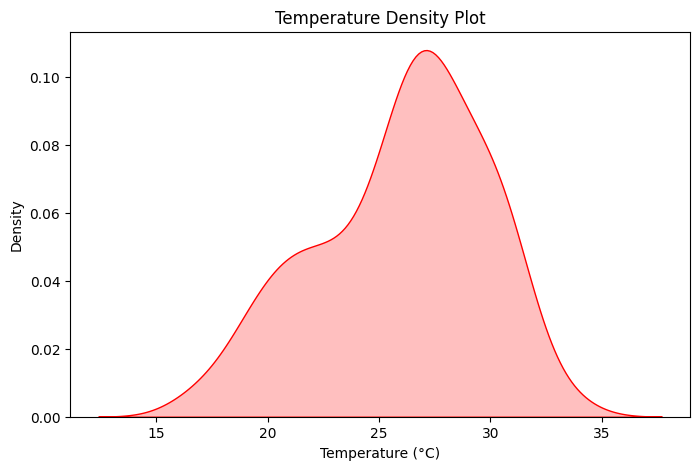

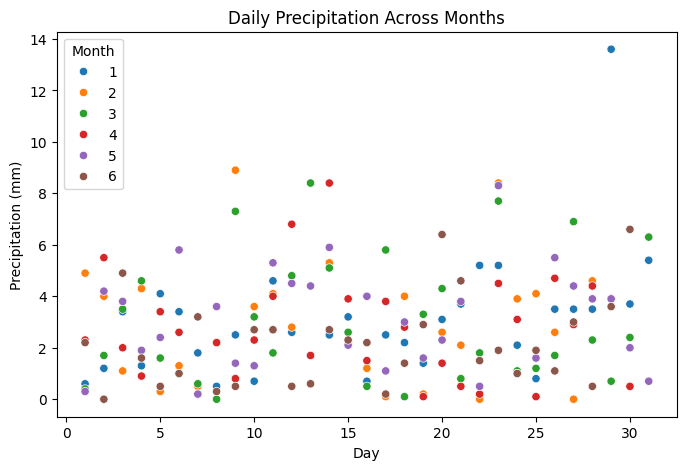

/tmp/ipython-input-731967203.py:152: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Month", y="Temperature (°C)", data=df, palette="muted")


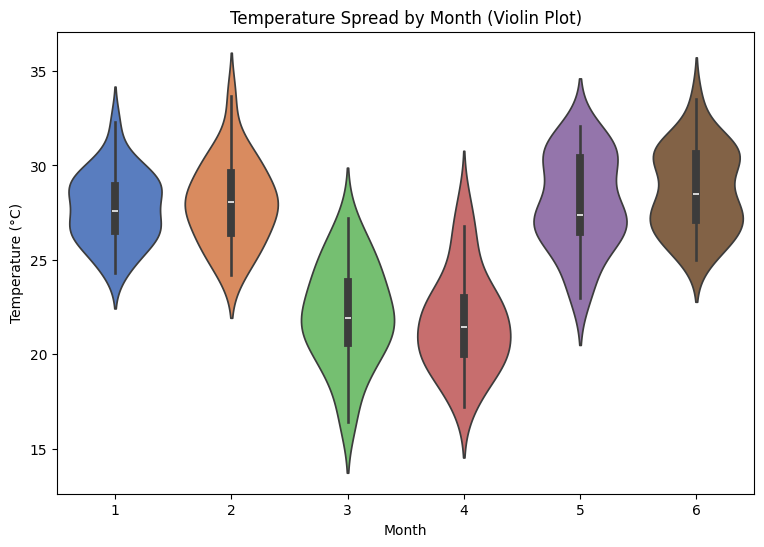

In [2]:
# Weather Trends Visualizer + ML Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Load Dataset
df = pd.read_csv("/content/weather_6months_sample (1).csv")
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print(df.head())

# 2. Data Cleaning (Pipeline)
# Handle missing values if any
df.fillna(df.mean(), inplace=True)

# 3. Exploratory Data Analysis (Visualizations)

## Line chart: Temperature trend over time
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Temperature (°C)'], label='Temperature', color='red')
plt.title("Daily Temperature Trend")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.grid(True)
plt.show()

## Bar chart: Monthly average precipitation
monthly_precip = df.groupby('Month')['Precipitation (mm)'].mean()
monthly_precip.plot(kind='bar', color='blue', figsize=(8,5))
plt.title("Average Monthly Precipitation")
plt.xlabel("Month")
plt.ylabel("Precipitation (mm)")
plt.show()

## Boxplot: Temperature distribution per month
plt.figure(figsize=(8,5))
sns.boxplot(x='Month', y='Temperature (°C)', data=df, palette="Set2")
plt.title("Temperature Distribution by Month")
plt.show()

## Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## Scatter plot: Temperature vs Precipitation
plt.figure(figsize=(7,5))
sns.scatterplot(x='Temperature (°C)', y='Precipitation (mm)', data=df, color="green")
plt.title("Temperature vs Precipitation")
plt.show()

# 4. ML Model: Predict Temperature using Day & Precipitation
X = df[['Day','Precipitation (mm)']]
y = df['Temperature (°C)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# 5. Model Evaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")

# 6. Visualization of Predictions
plt.figure(figsize=(8,5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred, label="Predicted", marker='x')
plt.title("Actual vs Predicted Temperatures")
plt.xlabel("Test Sample Index")
plt.ylabel("Temperature (°C)")
plt.legend()
plt.show()

# Extended Visualizations for Weather Trends

# 1. Histogram: Distribution of temperatures
plt.figure(figsize=(8,5))
plt.hist(df['Temperature (°C)'], bins=15, color='orange', edgecolor='black')
plt.title("Histogram of Daily Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# 2. Pie chart: Rainy vs Non-Rainy Days
rainy_days = (df['Precipitation (mm)'] > 0).sum()
dry_days = (df['Precipitation (mm)'] == 0).sum()
plt.figure(figsize=(6,6))
plt.pie([rainy_days, dry_days], labels=["Rainy Days", "Dry Days"], autopct='%1.1f%%', colors=['blue','gold'])
plt.title("Rainy vs Dry Days")
plt.show()

# 3. Boxplot: Precipitation distribution per month
plt.figure(figsize=(8,5))
sns.boxplot(x='Month', y='Precipitation (mm)', data=df, palette="coolwarm")
plt.title("Precipitation Distribution by Month")
plt.show()

# 4. Scatter Plot: Month vs Average Temperature
monthly_temp = df.groupby('Month')['Temperature (°C)'].mean().reset_index()
plt.figure(figsize=(7,5))
sns.scatterplot(x='Month', y='Temperature (°C)', data=monthly_temp, s=100, color="red")
plt.title("Average Temperature by Month")
plt.xlabel("Month")
plt.ylabel("Avg Temperature (°C)")
plt.grid(True)
plt.show()

# 5. Grouped Bar Chart: Avg Temperature & Precipitation per Month
monthly_summary = df.groupby('Month').agg({
    'Temperature (°C)': 'mean',
    'Precipitation (mm)': 'mean'
}).reset_index()

monthly_summary.plot(x='Month', kind='bar', figsize=(9,6))
plt.title("Average Temperature & Precipitation per Month")
plt.ylabel("Values")
plt.show()

# 6. KDE Plot (smooth distribution curve for temperature)
plt.figure(figsize=(8,5))
sns.kdeplot(df['Temperature (°C)'], fill=True, color="red")
plt.title("Temperature Density Plot")
plt.xlabel("Temperature (°C)")
plt.ylabel("Density")
plt.show()

# 7. Scatter Plot: Precipitation vs Day of Month
plt.figure(figsize=(8,5))
sns.scatterplot(x='Day', y='Precipitation (mm)', data=df, hue='Month', palette="tab10")
plt.title("Daily Precipitation Across Months")
plt.show()

# 8. Violin Plot: Temperature distribution by Month
plt.figure(figsize=(9,6))
sns.violinplot(x="Month", y="Temperature (°C)", data=df, palette="muted")
plt.title("Temperature Spread by Month (Violin Plot)")
plt.show()

